In [75]:
import PIL
from PIL import Image
import glob
import numpy as np
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

In [82]:
folder_path = "/Users/danieljones/OneDrive/Fourth_Year/EEE4114F/DanielSymbol2Spice/roryTestingData/ResizedTestPhotos"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

images = np.array(images)/255



In [77]:
loaded_model = models.load_model('Model4_Daniel_GNDfixed')

In [79]:

labels = ['Ground', 'Resistor', 'Inductor', 'Capacitor', 'Battery']

images = np.asarray(images)
#print(images)
predictions = loaded_model.predict(images)
#print(predictions)
est_y = np.zeros(len(images))
for i in range(15):

    for j in range(4):

        if predictions[i][j]>0.8:
           
            est_y[i] = j; 


1/1 [==============================] - 0s 72ms/step


In [80]:
def plot_sample(X,y,index,Labels):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Labels[int(y[index])])


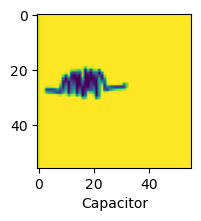

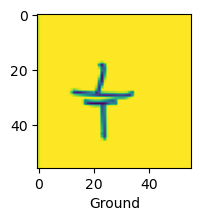

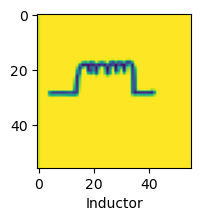

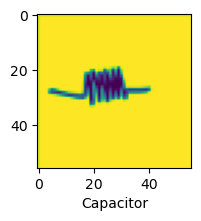

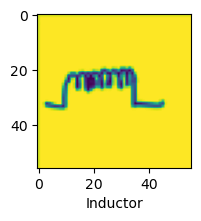

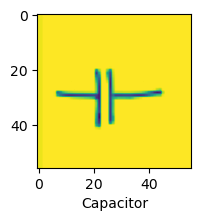

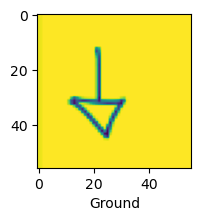

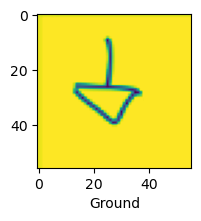

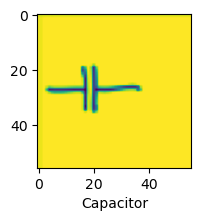

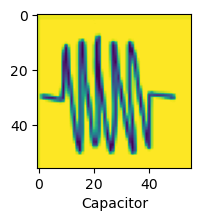

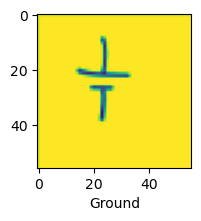

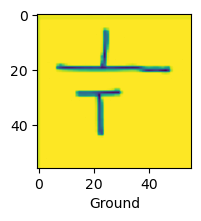

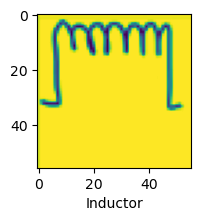

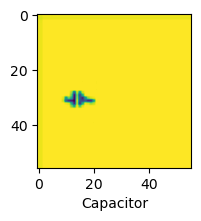

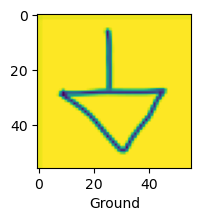

In [81]:
for i in range(len(images)):

    plot_sample(images,est_y,i,labels)